In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# linear regression(선형회귀)

In [157]:
import numpy as np
import pandas as pd

In [158]:
x = np.array([2, 3, 4, 5])
y = np.array([25, 50, 42, 61])

In [159]:
df = pd.DataFrame(x, columns = {'x'}, index = y)
display(df)

,x
25,2
50,3
42,4
61,5


# 그래프 표현

In [160]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'x, y and hypothesis')

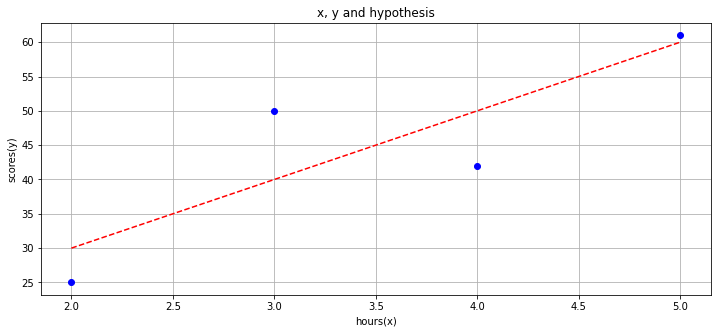

In [161]:
plt.figure(figsize=(12,5))
plt.plot(x,y, 'bo')  #'bo' 는 blu + 점으로 표현
plt.plot(x, 10*x+10, 'r--')  #'--' 점선으로 표현
plt.grid(True)
plt.xlabel('hours(x)')
plt.ylabel('scores(y)')
plt.title('x, y and hypothesis')

# error(선과 실제 값과의 차이), cost function

In [162]:
err = 10*x+10 -y  #10*x+10는 가설 값, y는 실제값
print(err)

[  5 -10   8  -1]


# mse(mean square error)

In [163]:
mse = (err**2).mean()  #에러를 제곱하고, 평균을 낸 값: (5제곱 + (-10)제곱 + 8제곱 + (-1)제곱)/4
print(mse)

47.5


In [164]:
rmse = mse**(1/2)  #제곱근
print(rmse)

6.892024376045111


Text(0.5, 1.0, 'x, y and hypothesis')

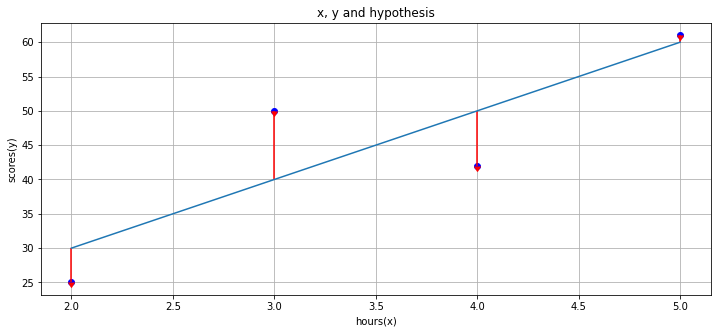

In [165]:
plt.figure(figsize=(12,5))
plt.plot(x,y, 'bo')  #'bo' 는 blu + 점으로 표현
plt.errorbar(x, 10*x+10, err, ecolor = 'r', uplims = [True], lolims = [False])  # 에러와 실제값의 차이를 표현
plt.grid(True)
plt.xlabel('hours(x)')
plt.ylabel('scores(y)')
plt.title('x, y and hypothesis')

# 경사하강법 optimizer

In [166]:
w = np.random.uniform(low = -1.0, high = 1.0)
b = np.random.uniform(low = -1.0, high = 1.0)  #b = bias

In [167]:
num_epoch = 1000  #1000번 반복

In [168]:
learning_rate = 0.0001  #학습율

In [169]:
w = np.random.uniform(low = -1.0, high = 1.0)
b = np.random.uniform(low = -1.0, high = 1.0)  #b = bias

errors = []   #error값을 정리할 array 선언
for epoch in range(num_epoch):
    y_hat = w*x+b  #y_hat은 가설함수
    error = ((y_hat - y)**2).mean()   #error를 mse로 만들어줌
    errors.append(error)   # 이후, error값을 살펴보기 위해 추가
   
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    if epoch % 10 ==0:
        print(f'epoch:{epoch}, w:{w}, b:{b}, error:{error}')
    
    if error < 0.0005:   #중단기준
        break

        
print('--------------------------------------------------------------------------')
print(f'epoch:{epoch}, w:{w}, b:{b}, error:{error}')

epoch:0, w:-0.0007021056891847836, b:-0.5486640432489669, error:2208.082673575693
epoch:10, w:0.16837713473784027, b:-0.5039001227931925, error:2146.76589444814
epoch:20, w:0.3350328919986919, b:-0.45976863117447997, error:2087.192650055183
epoch:30, w:0.49929987092717937, b:-0.41626051266341735, error:2029.3133625882251
epoch:40, w:0.6612122793787151, b:-0.37336684120991964, error:1973.0798639950933
epoch:50, w:0.8208038353471185, b:-0.3310788185862017, error:1918.44535589329
epoch:60, w:0.9781077739795081, b:-0.28938777255634357, error:1865.3643706231205
epoch:70, w:1.133156854490737, b:-0.24828515507206847, error:1813.792733408282
epoch:80, w:1.2859833669788143, b:-0.2077625404943571, error:1763.6875255924267
epoch:90, w:1.4366191391427272, b:-0.16781162384052925, error:1715.0070489211002
epoch:100, w:1.5850955429040658, b:-0.1284242190564267, error:1667.7107908393334
epoch:110, w:1.7314435009338203, b:-0.08959225731333928, error:1621.7593907760033
epoch:120, w:1.875693493085719, b:

# error chart(학습차트)

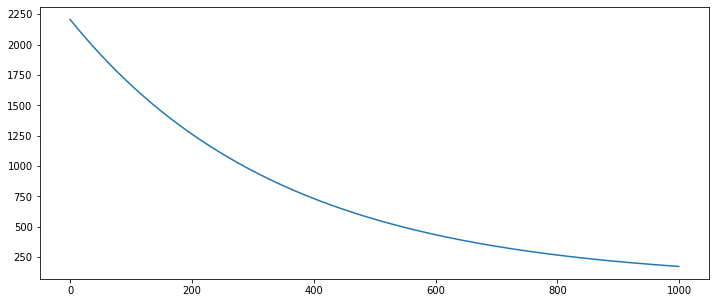

In [170]:
plt.figure(figsize = (12,5))
plt.plot(errors)

# kmeans clustering

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans   
from sklearn.datasets import make_blobs

In [172]:
np.random.seed(2022)

In [173]:
np.random.seed(2022)
x,y =make_blobs(n_samples =1000, centers =3, cluster_std =1.2)

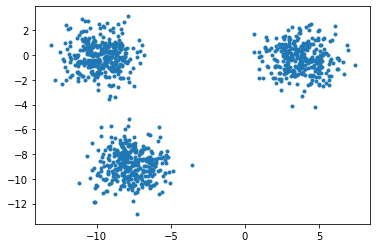

In [174]:
plt.scatter(x[:, 0], x[:, 1], marker = '.' )

In [175]:
kmeans =KMeans(init = 'k-means++', n_clusters =3, n_init = 12)  #kmeans를 'k-means++' 함수로 초기화
kmeans.fit(x)   #kmeans가 x값을 가지고 학습됨

KMeans(n_clusters=3, n_init=12)

In [176]:
kmeans_labels = kmeans.labels_
print(f'kmeans_labels:{kmeans_labels}')

kmeans_cluster_centers = kmeans.cluster_centers_
print(f'kmeans_cluster_centers:{kmeans_cluster_centers}')   #중심점 값 구하기

kmeans_labels:[1 2 2 2 2 0 0 0 2 2 0 1 2 0 1 2 1 0 0 0 1 2 2 1 2 0 1 1 2 0 0 1 2 2 1 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 2 0 2 0 2 2 0 0 2 2 1 0 2 1 2 0 2 2 0 2 0 2 0 0 1
 0 0 1 1 1 0 1 0 1 2 1 1 2 0 0 1 1 1 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 0 2 1
 1 2 0 0 1 0 2 0 1 1 1 2 2 0 0 2 1 2 2 2 1 1 0 1 2 2 2 0 1 2 1 1 0 2 2 2 2
 0 1 2 2 2 2 2 0 2 2 0 0 1 2 2 0 0 1 1 2 0 2 2 1 0 2 2 2 2 1 0 0 0 1 1 0 2
 1 0 0 2 1 1 2 0 2 0 1 2 2 1 2 2 2 1 1 0 0 2 0 0 0 1 1 0 0 2 2 0 1 1 2 1 0
 1 2 2 0 1 1 1 1 2 1 1 2 2 1 0 1 1 1 0 1 2 1 2 0 0 1 0 2 1 1 2 1 1 0 0 1 1
 1 1 1 0 2 2 0 1 0 0 0 2 0 1 1 1 2 0 0 0 2 2 1 2 1 0 1 0 0 0 2 0 1 1 1 2 0
 0 0 1 0 2 1 1 0 2 1 1 1 0 2 0 1 1 2 1 0 2 2 0 2 1 2 0 1 1 2 0 2 0 1 2 2 0
 2 1 2 2 1 0 0 2 1 1 0 0 2 0 0 1 2 2 1 2 2 1 1 2 2 0 1 0 2 0 2 2 2 1 0 2 1
 0 0 0 2 1 2 2 0 1 0 1 0 1 2 2 0 1 0 0 0 0 1 0 2 0 2 2 0 1 0 2 0 0 0 0 0 2
 0 0 0 0 2 1 1 2 2 0 2 1 0 0 2 1 2 1 2 1 1 0 2 2 2 1 0 2 2 1 2 2 0 1 0 2 2
 0 1 1 1 2 0 2 2 2 1 1 1 2 0 0 0 0 1 1 2 0 1 0 2 2 1 1 1 0 2 2 1 0 0 1 1 1
 1 2 2 2 2 

In [190]:
df_center = pd.DataFrame(kmeans.cluster_centers_, columns={'b', 'a'})   
display(df_center)

,a,b
0,-7.702887,-8.885808
1,3.726005,-0.305157
2,-9.744400,-0.104022


In [191]:
df = pd.DataFrame(data =x, columns ={'b', 'a'})  #df = dataframe
df['cluster_label'] = kmeans.labels_
display(df)

,a,b,cluster_label
0,5.055303,-0.605515,1
1,-9.596218,-0.888618,2
2,-9.412106,0.349877,2
3,-8.795810,0.400989,2
4,-10.777273,-0.542482,2
...,...,...,...
995,-10.170007,-1.533262,2
996,-7.745468,-9.811168,0
997,-9.329710,-0.871342,2
998,3.985246,-2.923879,1


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='a', ylabel='b'>

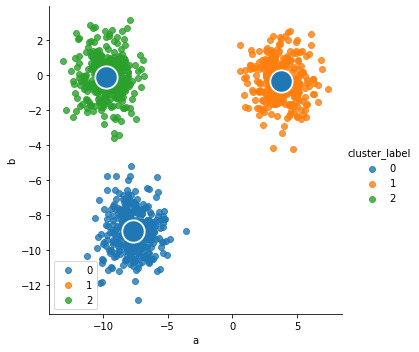

In [198]:
sns.lmplot(data= df, x= 'a', y= 'b', hue= 'cluster_label', fit_reg= False)
sns.scatterplot(data= df_center, x='a', y='b', s= 500)   #s = size